
# R Data Sampling and Experimental Design

-----------------------

BIO401-01/598-02 
 
Mar. 31 2021


In [5]:
library(raster)
library(googleVis)
library(leaflet)

Creating a generic function for ‘toJSON’ from package ‘jsonlite’ in package ‘googleVis’


Welcome to googleVis version 0.6.10

Please read Google's Terms of Use
before you start using the package:
https://developers.google.com/terms/

Note, the plot method of googleVis will by default use
the standard browser to display its output.

See the googleVis package vignettes for more details,
or visit https://github.com/mages/googleVis.

To suppress this message use:
suppressPackageStartupMessages(library(googleVis))




In [6]:
set.seed(30)

## Scaling

In [8]:
mesh <- raster(ncol=6, nrow=6, xmn=1, xmx=6, ymn=1, ymx=6)
mesh

class      : RasterLayer 
dimensions : 6, 6, 36  (nrow, ncol, ncell)
resolution : 0.8333333, 0.8333333  (x, y)
extent     : 1, 6, 1, 6  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 


In [12]:
mesh[] <- rpois(ncell(mesh), lambda=3)

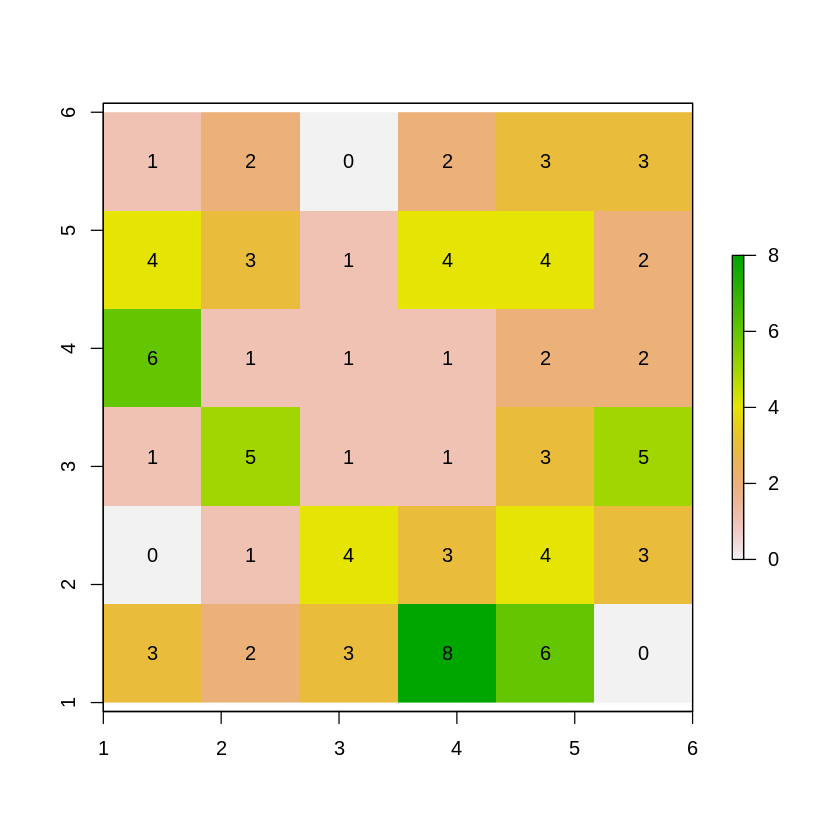

In [14]:
plot(mesh)
text(mesh,digits=2)

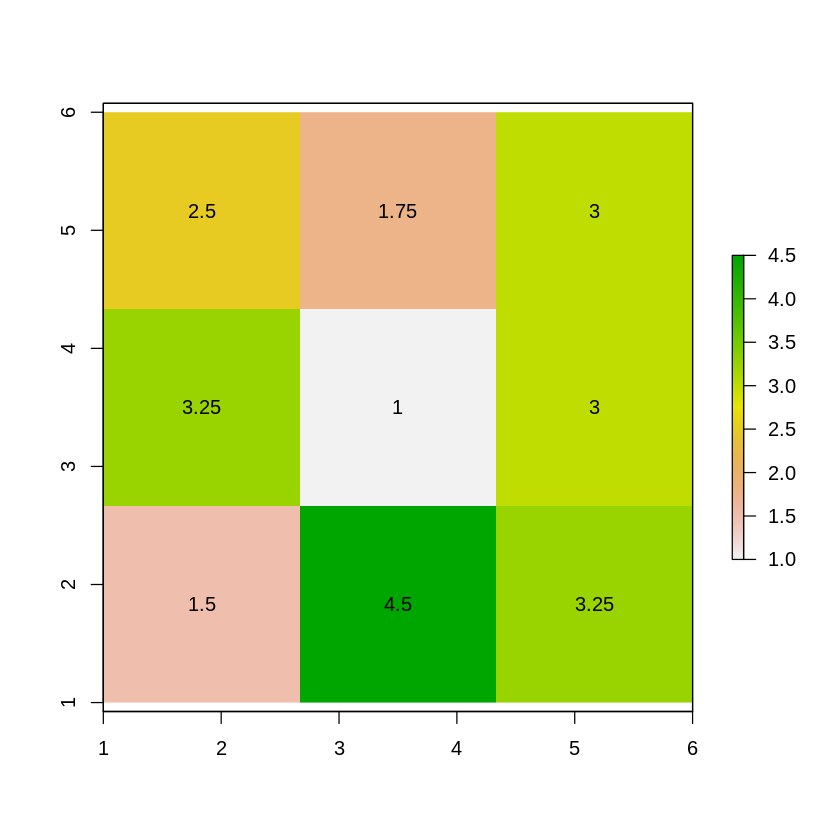

In [19]:
mesh_agg <- aggregate(mesh, fact=2, fun=mean)
plot(mesh_agg)
text(mesh_agg,digits=2)

In [16]:
cellStats(mesh,mean)

[1] 2.638889

In [17]:
cellStats(mesh,var)

[1] 3.437302

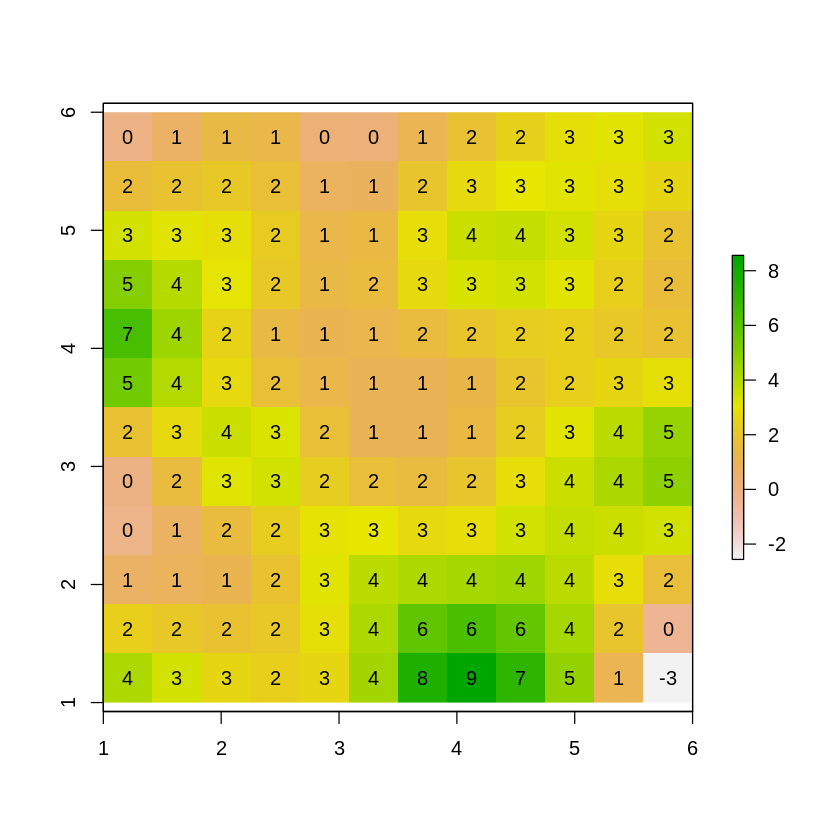

In [21]:
mesh_disagg <- disaggregate(mesh, fact=2, method="bilinear")
plot(mesh_disagg)
text(mesh_disagg)

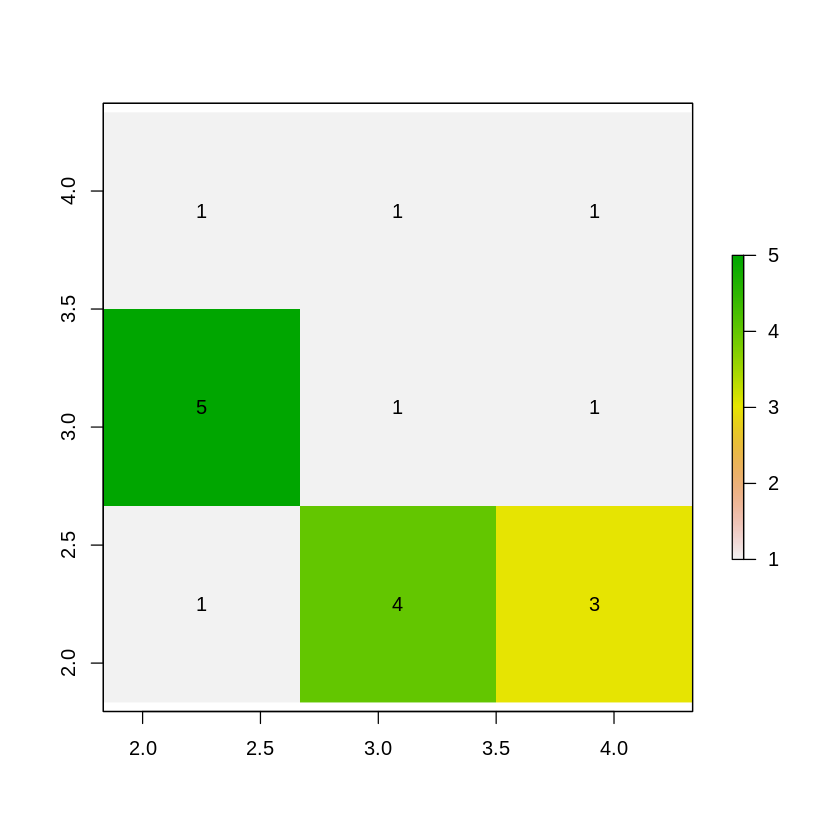

In [22]:
ext <- extent(2,4,2,4)
mesh_crop <- crop(mesh,ext)
plot(mesh_crop)
text(mesh_crop)

## Data Exploration

In [6]:
load("./R_db/Doubs.RData")

In [39]:
class(spe)

[1] "data.frame"

In [32]:
dim(spe)

[1] 30 27

In [33]:
head(spe)

,Cogo,Satr,Phph,Babl,Thth,Teso,Chna,Pato,Lele,Sqce,⋯,Scer,Cyca,Titi,Abbr,Icme,Gyce,Ruru,Blbj,Alal,Anan
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,3,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,5,4,3,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,5,5,5,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,4,5,5,0,0,0,0,0,1,⋯,0,0,1,0,0,0,0,0,0,0
5,0,2,3,2,0,0,0,0,5,2,⋯,2,0,3,0,0,0,5,0,0,0
6,0,3,4,5,0,0,0,0,1,2,⋯,0,0,2,0,0,0,1,0,0,0


In [34]:
summary(spe)

      Cogo           Satr           Phph            Babl            Thth     
 Min.   :0.00   Min.   :0.00   Min.   :0.000   Min.   :0.000   Min.   :0.00  
 1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.000   1st Qu.:1.000   1st Qu.:0.00  
 Median :0.00   Median :1.00   Median :3.000   Median :2.000   Median :0.00  
 Mean   :0.50   Mean   :1.90   Mean   :2.267   Mean   :2.433   Mean   :0.50  
 3rd Qu.:0.75   3rd Qu.:3.75   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:0.75  
 Max.   :3.00   Max.   :5.00   Max.   :5.000   Max.   :5.000   Max.   :4.00  
      Teso             Chna          Pato             Lele      
 Min.   :0.0000   Min.   :0.0   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.0   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.0   Median :0.0000   Median :1.000  
 Mean   :0.6333   Mean   :0.6   Mean   :0.8667   Mean   :1.433  
 3rd Qu.:0.7500   3rd Qu.:1.0   3rd Qu.:2.0000   3rd Qu.:2.000  
 Max.   :5.0000   Max.   :3.0   Max.   :4.0000   Max.   :5.000  

In [35]:
range(spe)

[1] 0 5

In [36]:
apply(spe,2,range)

Cogo,Satr,Phph,Babl,Thth,Teso,Chna,Pato,Lele,Sqce,⋯,Scer,Cyca,Titi,Abbr,Icme,Gyce,Ruru,Blbj,Alal,Anan
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,5,5,5,4,5,3,4,5,5,⋯,5,5,5,5,5,5,5,5,5,5


In [41]:
abcl <- table(unlist(spe))
abcl


  0   1   2   3   4   5 
435 108  87  62  54  64 

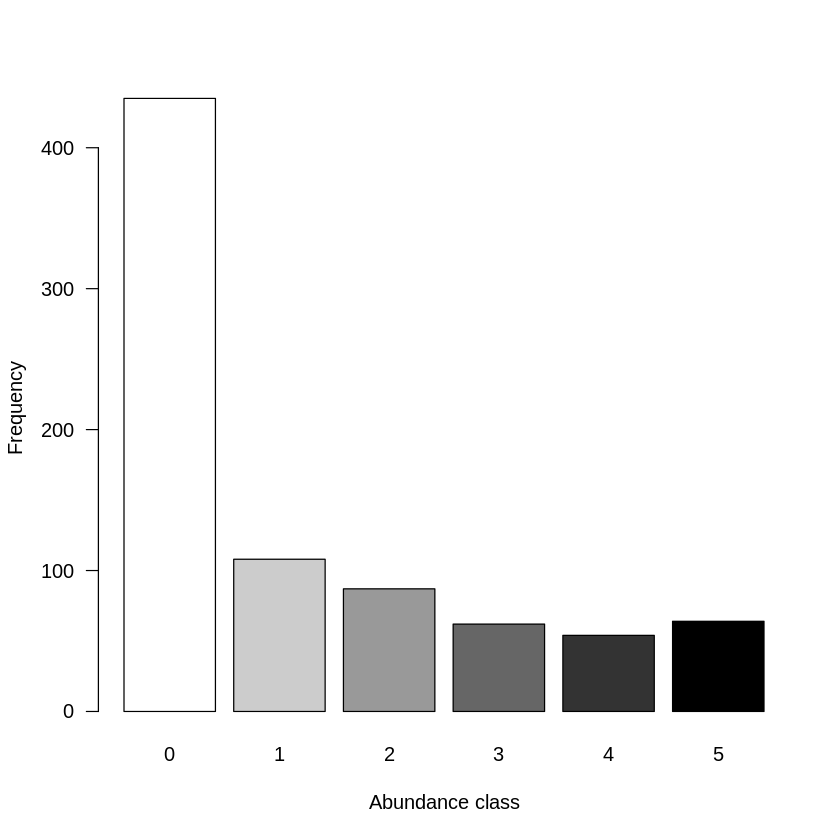

In [42]:
barplot(abcl, las = 1, xlab = "Abundance class", ylab = "Frequency", col = gray(5 : 0 / 5) )

In [43]:
sum(spe==0)

[1] 435

In [44]:
sum(spe==0)/(dim(spe)[1]*dim(spe)[2])

[1] 0.537037

In [45]:
class(spa)

[1] "data.frame"

In [46]:
head(spa)

,X,Y
,<dbl>,<dbl>
1,85.678,20.000
2,84.955,20.100
3,92.301,23.796
4,91.280,26.431
5,92.005,29.163
6,95.954,36.315


### sites location map 

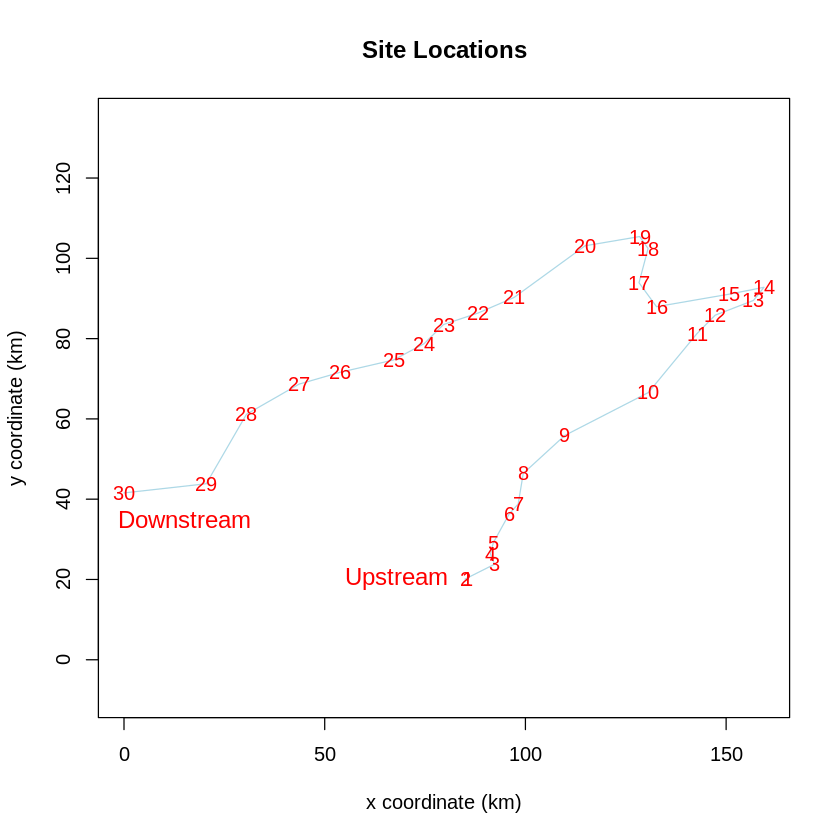

In [56]:
plot(spa, asp = 1, type = "n", main = "Site Locations", xlab = "x coordinate (km)", ylab = "y coordinate (km)" )
lines(spa, col = "light blue")
text(spa, row.names(spa), cex = 1, col = "red")
text(68, 20, "Upstream", cex = 1.2, col = "red")
text(15, 35, "Downstream", cex = 1.2, col = "red")

In [59]:
class(latlong)

[1] "data.frame"

In [16]:
longitude <- latlong$LongitudeE 
latitude <- latlong$LatitudeN 
site <- as.character(latlong$Site) 
background <- addTiles(leaflet(height="300")) 
myOSmap <- addMarkers( background, lng = longitude, lat = latitude, label = site, 
                     labelOptions = labelOptions(noHide = TRUE, textOnly = TRUE) ) 
myOSmap

HTML widgets cannot be represented in plain text (need html)

### Species Distributions

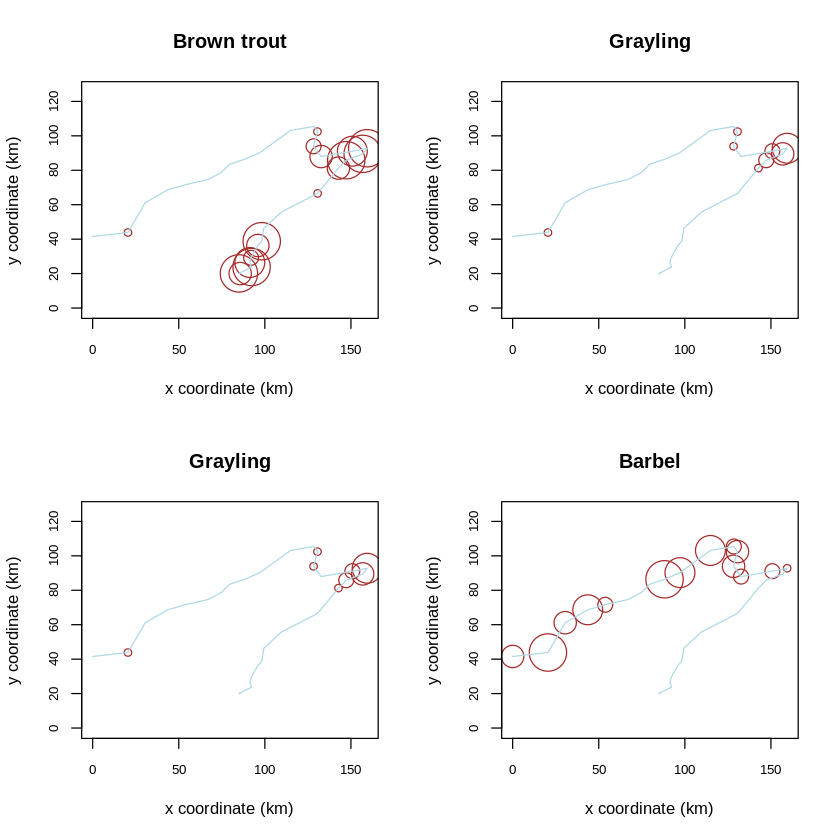

In [22]:
par(mfrow = c(2,2))
plot(spa, asp = 1, cex.axis = 0.8, col = "brown", cex = spe$Satr, 
     main = "Brown trout", xlab = "x coordinate (km)", ylab = "y coordinate (km)" )
lines(spa, col = "light blue")
plot(spa, asp = 1, cex.axis = 0.8, col = "brown", cex = spe$Thth, 
     main = "Grayling", xlab = "x coordinate (km)", ylab = "y coordinate (km)" ) 
lines(spa, col = "light blue")
plot(spa, asp = 1, cex.axis = 0.8, col = "brown", cex = spe$Thth, 
     main = "Grayling", xlab = "x coordinate (km)", ylab = "y coordinate (km)" ) 
lines(spa, col = "light blue")
plot(spa, asp = 1, cex.axis = 0.8, col = "brown", cex = spe$Baba, 
     main = "Barbel", xlab = "x coordinate (km)", ylab = "y coordinate (km)" ) 
lines(spa, col = "light blue")

In [25]:
spe.pres <- apply(spe > 0, 2, sum)
sort(spe.pres)
spe.freq <- 100 * spe.pres/nrow(spe)
round(sort(spe.freq), 1)

Icme Cogo Thth Teso Abbr Blbj Pato Rham Scer Anan Chna Albi Cyca Gyce Legi Baba 
   7    8    8    8    9   10   11   11   11   11   12   12   12   12   13   14 
Alal Pefl Satr Titi Lele Eslu Ruru Phph Gogo Babl Sqce 
  14   15   17   17   18   18   18   20   20   24   25

Icme Cogo Thth Teso Abbr Blbj Pato Rham Scer Anan Chna Albi Cyca Gyce Legi Baba 
23.3 26.7 26.7 26.7 30.0 33.3 36.7 36.7 36.7 36.7 40.0 40.0 40.0 40.0 43.3 46.7 
Alal Pefl Satr Titi Lele Eslu Ruru Phph Gogo Babl Sqce 
46.7 50.0 56.7 56.7 60.0 60.0 60.0 66.7 66.7 80.0 83.3

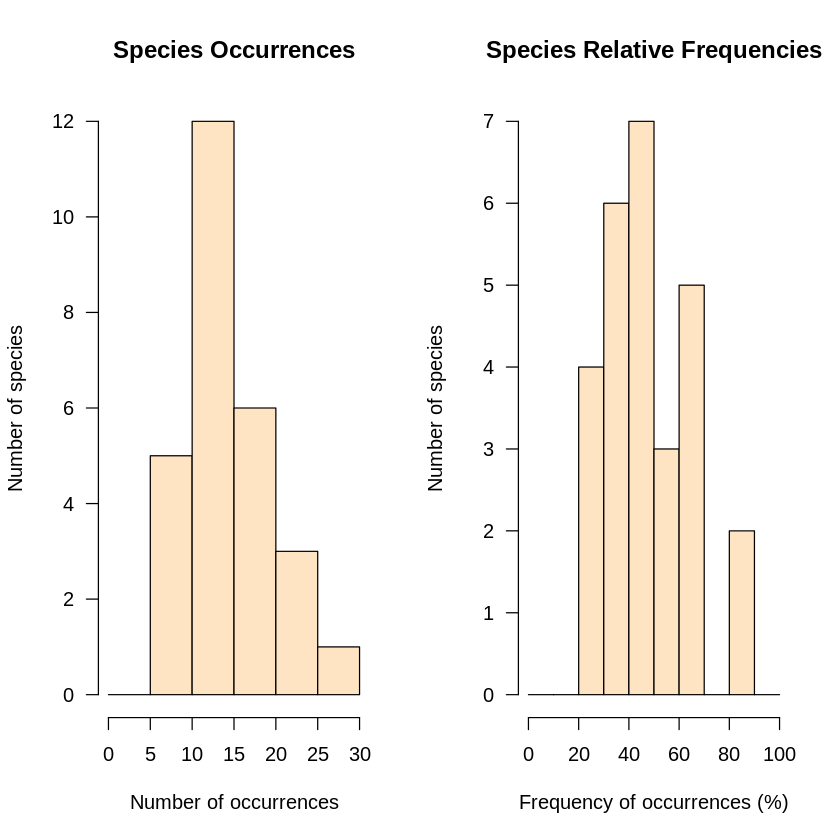

In [27]:
par(mfrow = c(1,2)) 
hist(spe.pres, main = "Species Occurrences", right = FALSE, las = 1, 
     xlab = "Number of occurrences", ylab = "Number of species", 
     breaks = seq(0, 30, by = 5), col = "bisque" ) 
hist(spe.freq, main = "Species Relative Frequencies", right = FALSE, las = 1, 
     xlab = "Frequency of occurrences (%)", ylab = "Number of species", 
     breaks = seq(0, 100, by = 10), col = "bisque" )

In [28]:
site.pres <- apply(spe > 0, 1, sum)

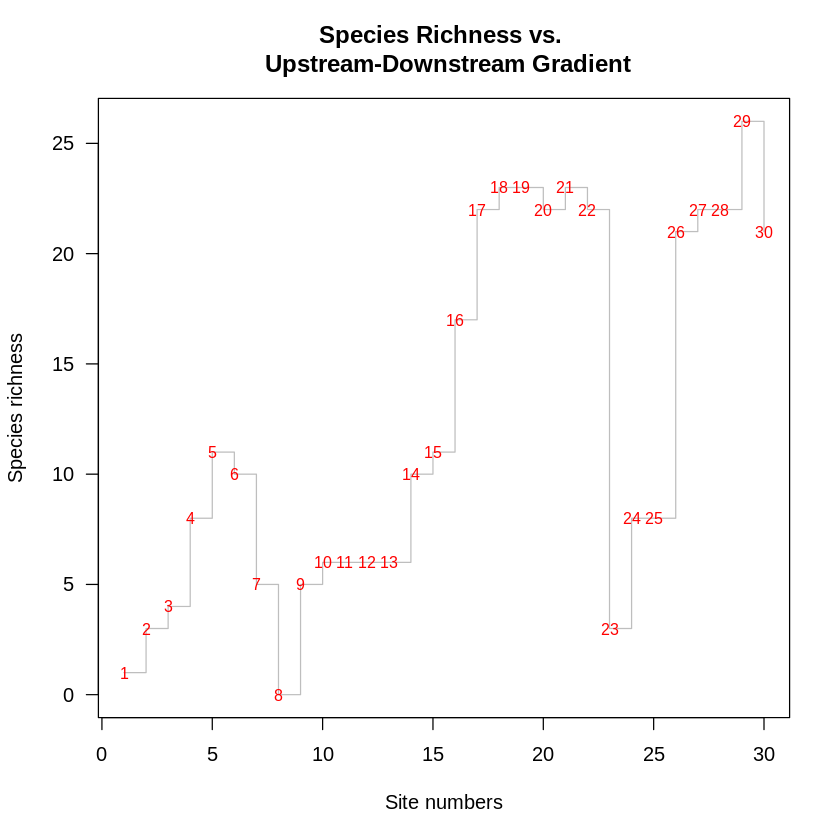

In [32]:
plot(site.pres,type = "s", las = 1, col = "gray", 
     main = "Species Richness vs. \n Upstream-Downstream Gradient", 
     xlab = "Site numbers", ylab = "Species richness" ) 
text(site.pres, row.names(spe),cex = .8, col = "red")

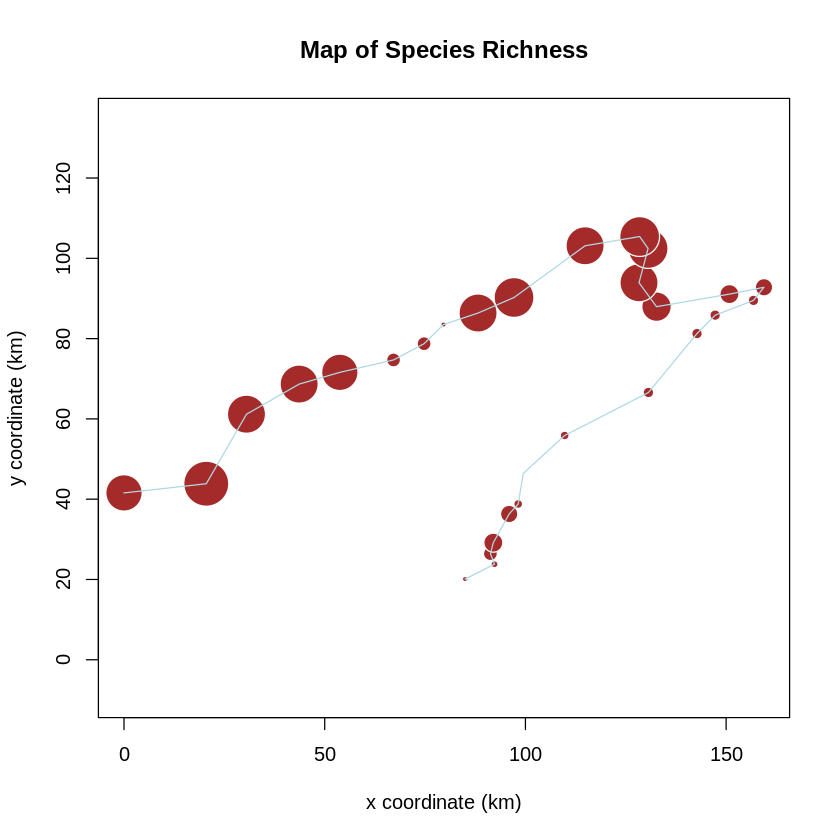

In [34]:
plot(spa, asp = 1, main = "Map of Species Richness", pch = 21, col = "white", 
     bg = "brown", cex = 5 * site.pres / max(site.pres), xlab = "x coordinate (km)",
     ylab = "y coordinate (km)" ) 
lines(spa, col = "light blue")